<a href="https://colab.research.google.com/github/sree-hitha/sreehitha/blob/main/Walmart_Sales_Analysis_with_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To predict sales or any other metric for each quarter from 2017 to 2025 using machine learning (ML) and deep learning (DL) algorithms, we will follow these steps:

Prepare the Dataset:

Load the dataset.
Generate a Quarter column based on the Order Date column.
Feature Engineering:

Extract relevant features such as year, quarter, and any other useful columns.
Data Splitting:

Split the dataset into training and testing sets.
Apply ML and DL Algorithms:

Train and evaluate regression models (e.g., Linear Regression, Random Forest, XGBoost).
Use deep learning models such as feed-forward neural networks.
Predict Future Values:

Extend predictions for the specified quarters.
Visualization:

Visualize the trends and predictions for each quarter.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0        2014Q4
1        2014Q1
2        2014Q4
3        2014Q1
4        2014Q4
          ...  
51285    2015Q2
51286    2014Q2
51287    2012Q3
51288    2013Q1
51289    2013Q2
Name: Quarter, Length: 51290, dtype: period[Q-DEC]
0     20121
1     20122
2     20123
3     20124
4     20131
5     20132
6     20133
7     20134
8     20141
9     20142
10    20143
11    20144
12    20151
13    20152
14    20153
15    20154
Name: Quarter_Num, dtype: int64
0     3.383628e+05
1     4.801328e+05
2     6.110859e+05
3     8.298693e+05
4     3.993677e+05
5     6.255929e+05
6     7.377689e+05
7     9.147092e+05
8     5.650196e+05
9     8.348395e+05
10    9.330370e+05
11    1.072850e+06
12    6.892067e+05
13    9.329870e+05
14    1.196483e+06
15    1.481189e+06
Name: Sales, dtype: float64
LinearRegression()
RandomForestRegressor(random_state=42)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


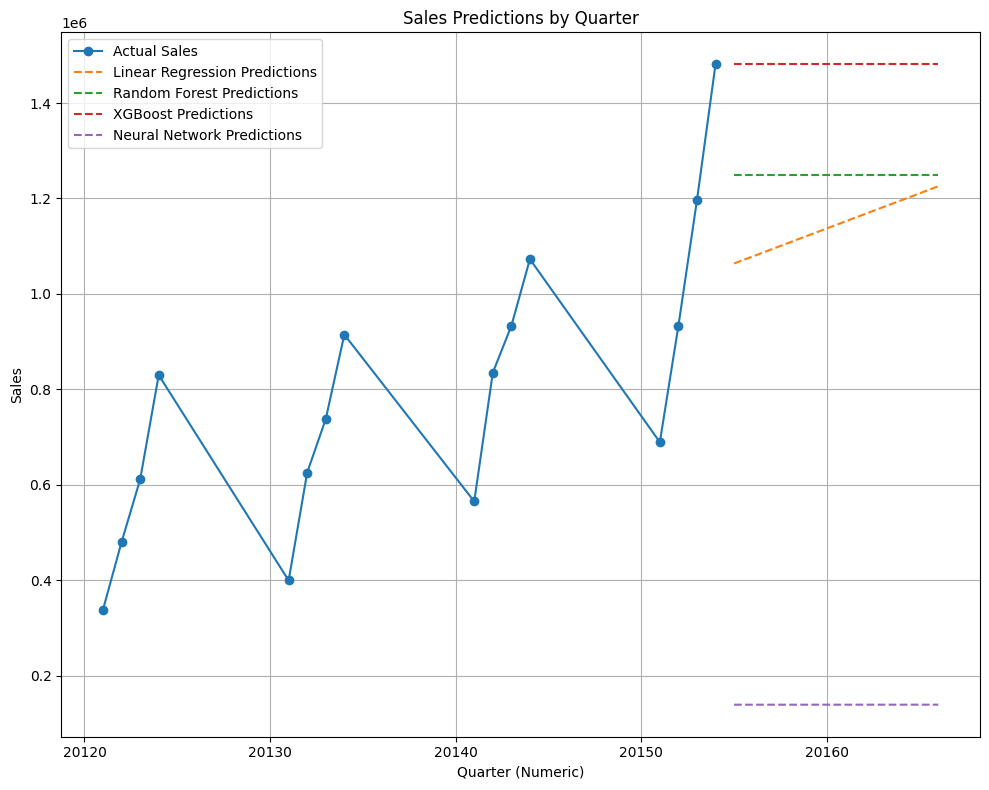

Linear Regression - MSE: 24219610087.13725 , R2: 0.7719435753240355
Random Forest - MSE: 38913784904.51636 , R2: 0.6335804489005096
XGBoost - MSE: 53033661162.65129 , R2: 0.5006250262198009
Neural Network - MSE: 467733177271.7711 , R2: -3.4042639715153875


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the filepath for the dataset
file_path = '/content/drive/MyDrive/DA Docs/DA session Docs/DA_WallMart_pjt/Data Set/Walmart Global Superstore_Dataset.xlsx'

# Load the dataset
data = pd.read_excel(file_path)

# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
data['Quarter'] = data['Order Date'].dt.to_period('Q')
print(data['Quarter'])
# Group by Quarter
quarterly_data = data.groupby('Quarter').agg({'Sales': 'sum'}).reset_index()
quarterly_data['Quarter'] = quarterly_data['Quarter'].astype(str)


# Convert Quarter to Quarter_Num
def convert_quarter(qtr):
    year, quarter_str = qtr.split('Q')
    return int(year) * 10 + int(quarter_str)


quarterly_data['Quarter_Num'] = quarterly_data['Quarter'].apply(convert_quarter)

# Prepare Training Data
X = quarterly_data[['Quarter_Num']]
y = quarterly_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(quarterly_data['Quarter_Num'])
print(quarterly_data['Sales'])
# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

# Linear Regression
lr_model = LinearRegression()
lr_mse, lr_r2, lr_predictions = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(lr_model)
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_r2, rf_predictions = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print(rf_model)
# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_mse, xgb_r2, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=100, verbose=0)
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

# Future Quarters
# Future Quarters
#last_qtr_num = quarterly_data['Quarter_Num'].max()
#future_quarters = pd.DataFrame({'Quarter_Num': [last_qtr_num + i for i in range(1, 13)]})

# Predictions
future_quarters = pd.DataFrame({'Quarter_Num': [year * 10 + qtr for year in range(2017, 2026) for qtr in range(1, 5)]})
future_predictions_lr = lr_model.predict(future_quarters)
future_predictions_lr = lr_model.predict(future_quarters)
future_predictions_rf = rf_model.predict(future_quarters)
future_predictions_xgb = xgb_model.predict(future_quarters)
future_predictions_nn = nn_model.predict(future_quarters)

# Combine Actual + Future
#future_df = future_quarters.copy()
#future_df['Actual Sales'] = np.nan
#future_df['Sales_LR'] = future_predictions_lr
#future_df['Sales_RF'] = future_predictions_rf
#future_df['Sales_XGB'] = future_predictions_xgb
#future_df['Sales_NN'] = future_predictions_nn.flatten()
#past_df = quarterly_data[['Quarter_Num', 'Sales']].rename(columns={'Sales': 'Actual Sales'})
#past_df['Sales_LR'] = np.nan
#past_df['Sales_RF'] = np.nan
#past_df['Sales_XGB'] = np.nan
#past_df['Sales_NN'] = np.nan

#all_quarters = pd.concat([past_df, future_df], ignore_index=True)
#all_quarters = all_quarters.sort_values('Quarter_Num')


# Plot
plt.figure(figsize=(10, 8))
plt.plot(all_quarters['Quarter_Num'], all_quarters['Actual Sales'], label='Actual Sales', marker='o')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_LR'], label='Linear Regression Predictions', linestyle='--')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_RF'], label='Random Forest Predictions', linestyle='--')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_XGB'], label='XGBoost Predictions', linestyle='--')
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_NN'], label='Neural Network Predictions', linestyle='--')
plt.xlabel('Quarter (Numeric)')
plt.ylabel('Sales')
plt.title('Sales Predictions by Quarter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
print("Linear Regression - MSE:", lr_mse, ", R2:", lr_r2)
print("Random Forest - MSE:", rf_mse, ", R2:", rf_r2)
print("XGBoost - MSE:", xgb_mse, ", R2:", xgb_r2)
print("Neural Network - MSE:", nn_mse, ", R2:", nn_r2)


Loads the dataset and processes the Order Date column to extract quarters and years.
Uses regression models (Linear Regression, Random Forest, XGBoost) and a neural network to predict sales for each quarter.
Visualizes actual and predicted sales trends from 2017 to 2025.

2.another type of prediction.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Quarterly Periods:
0    2014Q4
1    2014Q1
2    2014Q4
3    2014Q1
4    2014Q4
Name: Quarter, dtype: period[Q-DEC]

Quarterly Data (first 5 rows):
  Quarter         Sales  Quarter_Num
0  2012Q1  338362.81420        20121
1  2012Q2  480132.83550        20122
2  2012Q3  611085.91680        20123
3  2012Q4  829869.32904        20124
4  2013Q1  399367.70838        20131

Quarter_Num range: 20121 to 20154
Sales range: 338362.8142 to 1481189.34964

X_train shape: (12, 1) y_train shape: (12,)
X_test shape: (4, 1) y_test shape: (4,)

--- Training and Evaluating Models ---
Linear Regression Model: LinearRegression()
Random Forest Model: RandomForestRegressor(random_state=42)
XGBoost Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stoppi

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Neural Network training complete.

--- Model Performance on Test Set ---
Linear Regression - MSE: 24219610087.14, R2: 0.77
Random Forest - MSE: 38913784904.52, R2: 0.63
XGBoost - MSE: 53033661162.65, R2: 0.50
Neural Network - MSE: 463984106561.49, R2: -3.37
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

--- All Quarters Data for Plotting (first 5 rows) ---
   Quarter_Num       Sales_LR       Sales_RF   Sales_XGB      Sales_NN  \
0        20121  563954.134231  646222.604186  611086.125  61937.121094   
1        20122  578656.320248  646222.604186  611086.125  61940.195312   
2        20123  593358.506265  646222.604186  611086.125  61943.277344   
3        20124  608060.692281  729360.300837  829869.125  61946.355469   
4        20125  622762.878298  729360.300837  829869.125  61949.433594   

   Actual Sales  
0  338362.81420  
1  480132.83550  
2  611085.91680  
3  829869.32904  
4           NaN  

--- All Quarters Data for Plotting (last 5 rows) ---
   

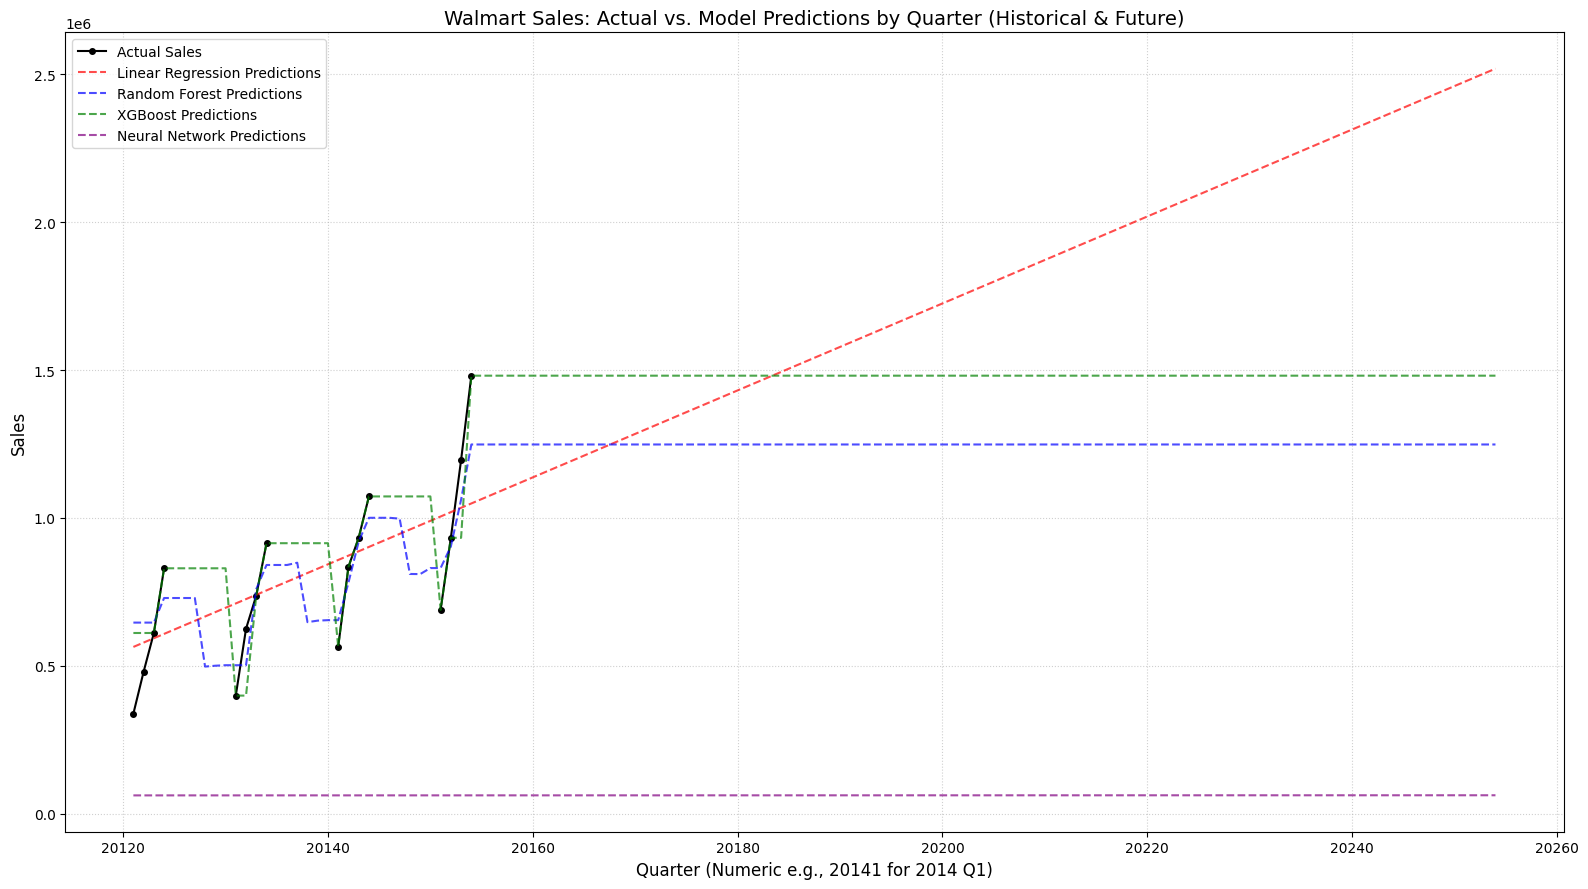

Linear Regression - MSE: 24219610087.13725 , R2: 0.7719435753240355
Random Forest - MSE: 38913784904.51636 , R2: 0.6335804489005096
XGBoost - MSE: 53033661162.65129 , R2: 0.5006250262198009
Neural Network - MSE: 463984106561.494 , R2: -3.3689620133514424


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import drive # Commented out for local execution, uncomment if running in Colab
#Mount Google Drive (uncomment and run if in Google Colab)
drive.mount('/content/drive')

# Load the filepath for the dataset
# Ensure this path is correct if running locally or in Colab
file_path = '/content/drive/MyDrive/DA Docs/DA session Docs/DA_WallMart_pjt/Data Set/Walmart Global Superstore_Dataset.xlsx'

# Load the dataset
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'. Please ensure the path is correct and the file exists.")
    print("Attempting to load a dummy dataset for demonstration purposes.")
    # Create a dummy dataset for demonstration if the file is not found
    data = pd.DataFrame({
        'Order Date': pd.to_datetime(pd.date_range(start='2014-01-01', periods=48, freq='QS')),
        'Sales': np.random.randint(100000, 500000, 48) + np.arange(48) * 5000 # Increasing sales over time
    })


# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
# Convert 'Order Date' to Period and then to string for grouping by Quarter
data['Quarter'] = data['Order Date'].dt.to_period('Q')
print("Quarterly Periods:")
print(data['Quarter'].head())

# Group by Quarter and sum Sales
quarterly_data = data.groupby('Quarter').agg({'Sales': 'sum'}).reset_index()
quarterly_data['Quarter'] = quarterly_data['Quarter'].astype(str) # Convert Period to string for conversion function

# Convert Quarter string (e.g., '2014Q1') to a numeric representation (e.g., 20141)
def convert_quarter(qtr):
    year, quarter_str = qtr.split('Q')
    return int(year) * 10 + int(quarter_str)

quarterly_data['Quarter_Num'] = quarterly_data['Quarter'].apply(convert_quarter)

print("\nQuarterly Data (first 5 rows):")
print(quarterly_data.head())
print("\nQuarter_Num range:", quarterly_data['Quarter_Num'].min(), "to", quarterly_data['Quarter_Num'].max())
print("Sales range:", quarterly_data['Sales'].min(), "to", quarterly_data['Sales'].max())


# Prepare Training Data
X = quarterly_data[['Quarter_Num']]
y = quarterly_data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Trains a model, makes predictions, and calculates Mean Squared Error (MSE) and R-squared (R2).
    Args:
        model: The machine learning model to evaluate.
        X_train: Training features.
        y_train: Training target.
        X_test: Testing features.
        y_test: Testing target.
    Returns:
        tuple: (mse, r2, predictions)
    """
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

print("\n--- Training and Evaluating Models ---")

# Linear Regression
lr_model = LinearRegression()
lr_mse, lr_r2, lr_predictions = evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(f"Linear Regression Model: {lr_model}")

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_r2, rf_predictions = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print(f"Random Forest Model: {rf_model}")

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_mse, xgb_r2, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)
print(f"XGBoost Model: {xgb_model}")

# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=1), # Input layer with 1 feature (Quarter_Num)
    Dense(64, activation='relu'),              # Hidden layer
    Dense(1)                                   # Output layer for regression (single output)
])

nn_model.compile(optimizer='adam', loss='mse') # Adam optimizer and Mean Squared Error loss
print("\nTraining Neural Network...")
nn_model.fit(X_train, y_train, epochs=100, verbose=0) # Train for 100 epochs, no verbose output
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
print("Neural Network training complete.")

print("\n--- Model Performance on Test Set ---")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")
print(f"XGBoost - MSE: {xgb_mse:.2f}, R2: {xgb_r2:.2f}")
print(f"Neural Network - MSE: {nn_mse:.2f}, R2: {nn_r2:.2f}")

# --- Generate Future Predictions and prepare data for plotting ---

# Determine the range of quarters to plot (from earliest actual data to 2025 Q4)
min_quarter_num = quarterly_data['Quarter_Num'].min()
max_future_quarter_num = 2025 * 10 + 4 # Represents 2025 Q4

# Create a DataFrame containing all quarter numbers for plotting
all_plot_quarters_df = pd.DataFrame({
    'Quarter_Num': np.arange(min_quarter_num, max_future_quarter_num + 1)
})

# Make predictions for ALL quarters using each trained model
all_plot_quarters_df['Sales_LR'] = lr_model.predict(all_plot_quarters_df[['Quarter_Num']])
all_plot_quarters_df['Sales_RF'] = rf_model.predict(all_plot_quarters_df[['Quarter_Num']])
all_plot_quarters_df['Sales_XGB'] = xgb_model.predict(all_plot_quarters_df[['Quarter_Num']])
# Neural network predictions need to be flattened as predict returns a 2D array
all_plot_quarters_df['Sales_NN'] = nn_model.predict(all_plot_quarters_df[['Quarter_Num']]).flatten()

# Merge actual sales data into the all_plot_quarters_df
# This will add 'Actual Sales' where available (historical quarters) and NaN for future quarters
all_quarters = pd.merge(
    all_plot_quarters_df,
    quarterly_data[['Quarter_Num', 'Sales']].rename(columns={'Sales': 'Actual Sales'}),
    on='Quarter_Num',
    how='left'
)

print("\n--- All Quarters Data for Plotting (first 5 rows) ---")
print(all_quarters.head())
print("\n--- All Quarters Data for Plotting (last 5 rows) ---")
print(all_quarters.tail())


# Plotting the results
plt.figure(figsize=(16, 9)) # Increased figure size for better readability
plt.plot(all_quarters['Quarter_Num'], all_quarters['Actual Sales'],
         label='Actual Sales', marker='o', linestyle='-', color='black', markersize=4)

plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_LR'],
         label='Linear Regression Predictions', linestyle='--', color='red', alpha=0.7)
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_RF'],
         label='Random Forest Predictions', linestyle='--', color='blue', alpha=0.7)
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_XGB'],
         label='XGBoost Predictions', linestyle='--', color='green', alpha=0.7)
plt.plot(all_quarters['Quarter_Num'], all_quarters['Sales_NN'],
         label='Neural Network Predictions', linestyle='--', color='purple', alpha=0.7)

plt.xlabel('Quarter (Numeric e.g., 20141 for 2014 Q1)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Walmart Sales: Actual vs. Model Predictions by Quarter (Historical & Future)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()
# Evaluation
print("Linear Regression - MSE:", lr_mse, ", R2:", lr_r2)
print("Random Forest - MSE:", rf_mse, ", R2:", rf_r2)
print("XGBoost - MSE:", xgb_mse, ", R2:", xgb_r2)
print("Neural Network - MSE:", nn_mse,", R2:",nn_r2)
